In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = "../img/"


In [8]:
def imshow(img):
    cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [14]:
def bgr2rgb(bgr):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reading Images

## Read a grayscale image

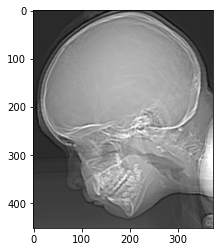

In [9]:
#%% Reading a grayscale image
imfile = "ctskull.tif"
img = cv2.imread(os.path.join(path,imfile), cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()


In [11]:
imshow(img)

## Read a color image

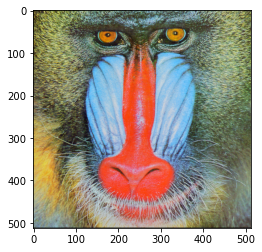

In [15]:
imfile = "baboon.png"
img = cv2.imread(os.path.join(path,imfile), cv2.IMREAD_COLOR)
plt.imshow(bgr2rgb(img))
plt.show()


In [17]:
imshow(img)

## Read a color image and visualize each channel separately

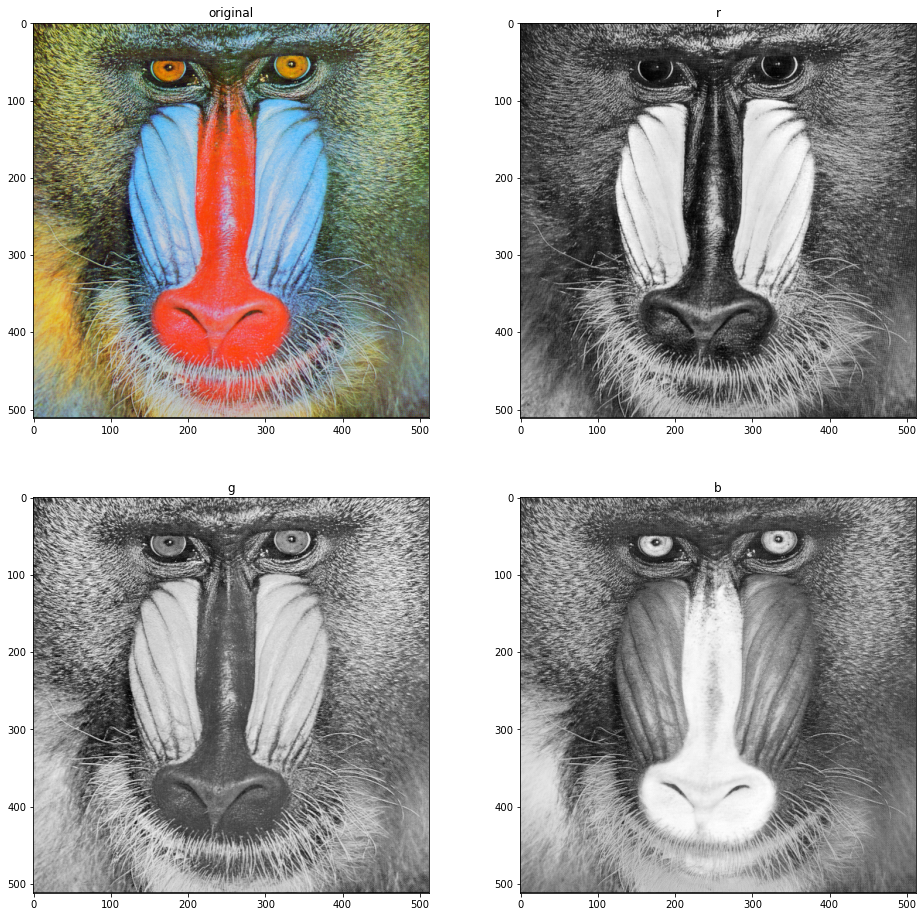

In [29]:
imfile = 'baboon.png'
img = cv2.imread(os.path.join(path, imfile), cv2.IMREAD_COLOR)
bgr = cv2.split(img)
b, g, r = cv2.split(img)

plt.figure(figsize = (16,16))
plt.subplot(221); plt.title("original"); plt.imshow(bgr2rgb(img))
plt.subplot(222); plt.title("r"); plt.imshow(bgr[0], cmap='gray')
plt.subplot(223); plt.title("g"); plt.imshow(bgr[1], cmap='gray')
plt.subplot(224); plt.title("b"); plt.imshow(bgr[2], cmap='gray')
plt.show()